In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

# Exact Experiments

In [2]:
environments = [
    "Deterministic (0.05)",
    "Deterministic (0.1)",
    "Deterministic (0.2)",
]

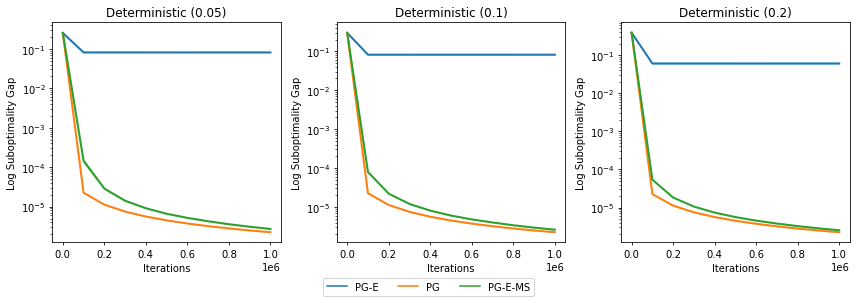

In [4]:
log_dir = "logs"
experiment_name = f"uni_init"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy_uniform.png", bbox_inches="tight", dpi=400)

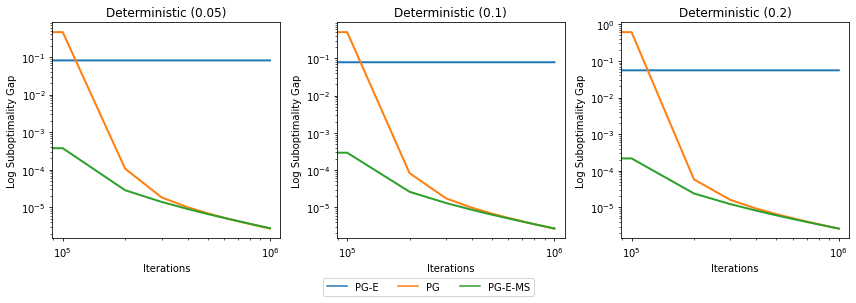

In [17]:
log_dir = "tests"
experiment_name = f"bad_init"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_xscale('log')
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy_bad.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

## Uniform Initilization

In [6]:
environments = [
    "Fixed",
    "Fixed"
    # "Bernoulli (easy)",
    # "Gaussian (easy)",
    # "Beta (easy)",
    # "Bernoulli (hard)",
    # "Gaussian (hard)",
    # "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"constant_eta_snpg_debug"
path = f"{log_dir}/{experiment_name}"

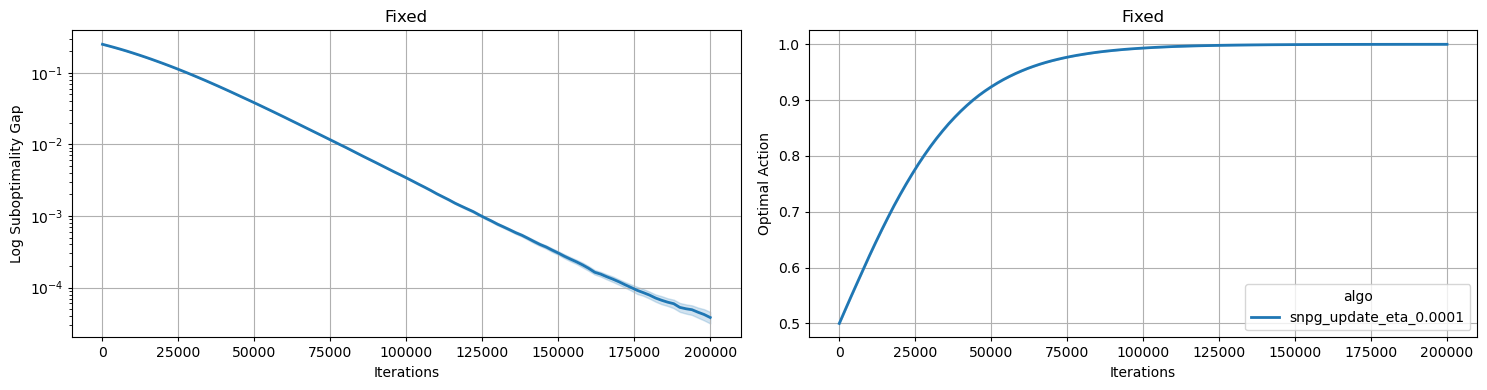

In [10]:
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    if idx == 0:
        line_plot = sns.lineplot(
            data=df_baseline, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
        )
        # remove legend in subplots
        line_plot.get_legend().remove()
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Log Suboptimality Gap")
        ax.set_yscale("log")
    else:
        prob = sns.lineplot(
            data=df_baseline, x="iteration", y="opt_action_pr", hue="algo", ax=ax, linewidth=2.0
        )
        # prob = sns.lineplot(
        #     data=df_baseline, x="iteration", y="opt_action_pr", hue="instance_number", ax=ax, linewidth=2.0
        # )
        # remove legend in subplots
        # prob.get_legend().remove()
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Optimal Action")
    ax.set_title(env)
    ax.grid(True)

    # n_lines = len(ax.lines) // 2
    # for i in range(n_lines, 2 * n_lines):
    #     if "entropy" in ax.lines[i].get_label():
    #         ax.lines[i].set_linestyle("--")
    #         ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
# lines, labels = fig.axes[0].get_legend_handles_labels()

# renamer = {
#     "spg_ess": "SPG-ESS",
#     "spg_gradient_step_size": "SPG-O-G",
#     "spg_delta_step_size": "SPG-O-R",
#     "spg_ess_eta_0_1_18": "SPG-ESS",
#     "spg_entropy_multistage": "SPG-E-MS",
#     "spg_multistage_ess": "SPG-ESS [D]",
#     "spg_entropy_ess": "SPG-E-ESS",
# }

# labels = [renamer.get(label, label) for label in labels]

# fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
# plt.tight_layout()
# plt.savefig("plots/snpg_eta_0.0001.png", bbox_inches="tight", dpi=400)

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3
pd.options.mode.chained_assignment = None

# define envs.
# environments = [
#     "Deterministic (0.05)",
#     "Deterministic (0.1)",
#     "Deterministic (0.2)",
# ]
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]

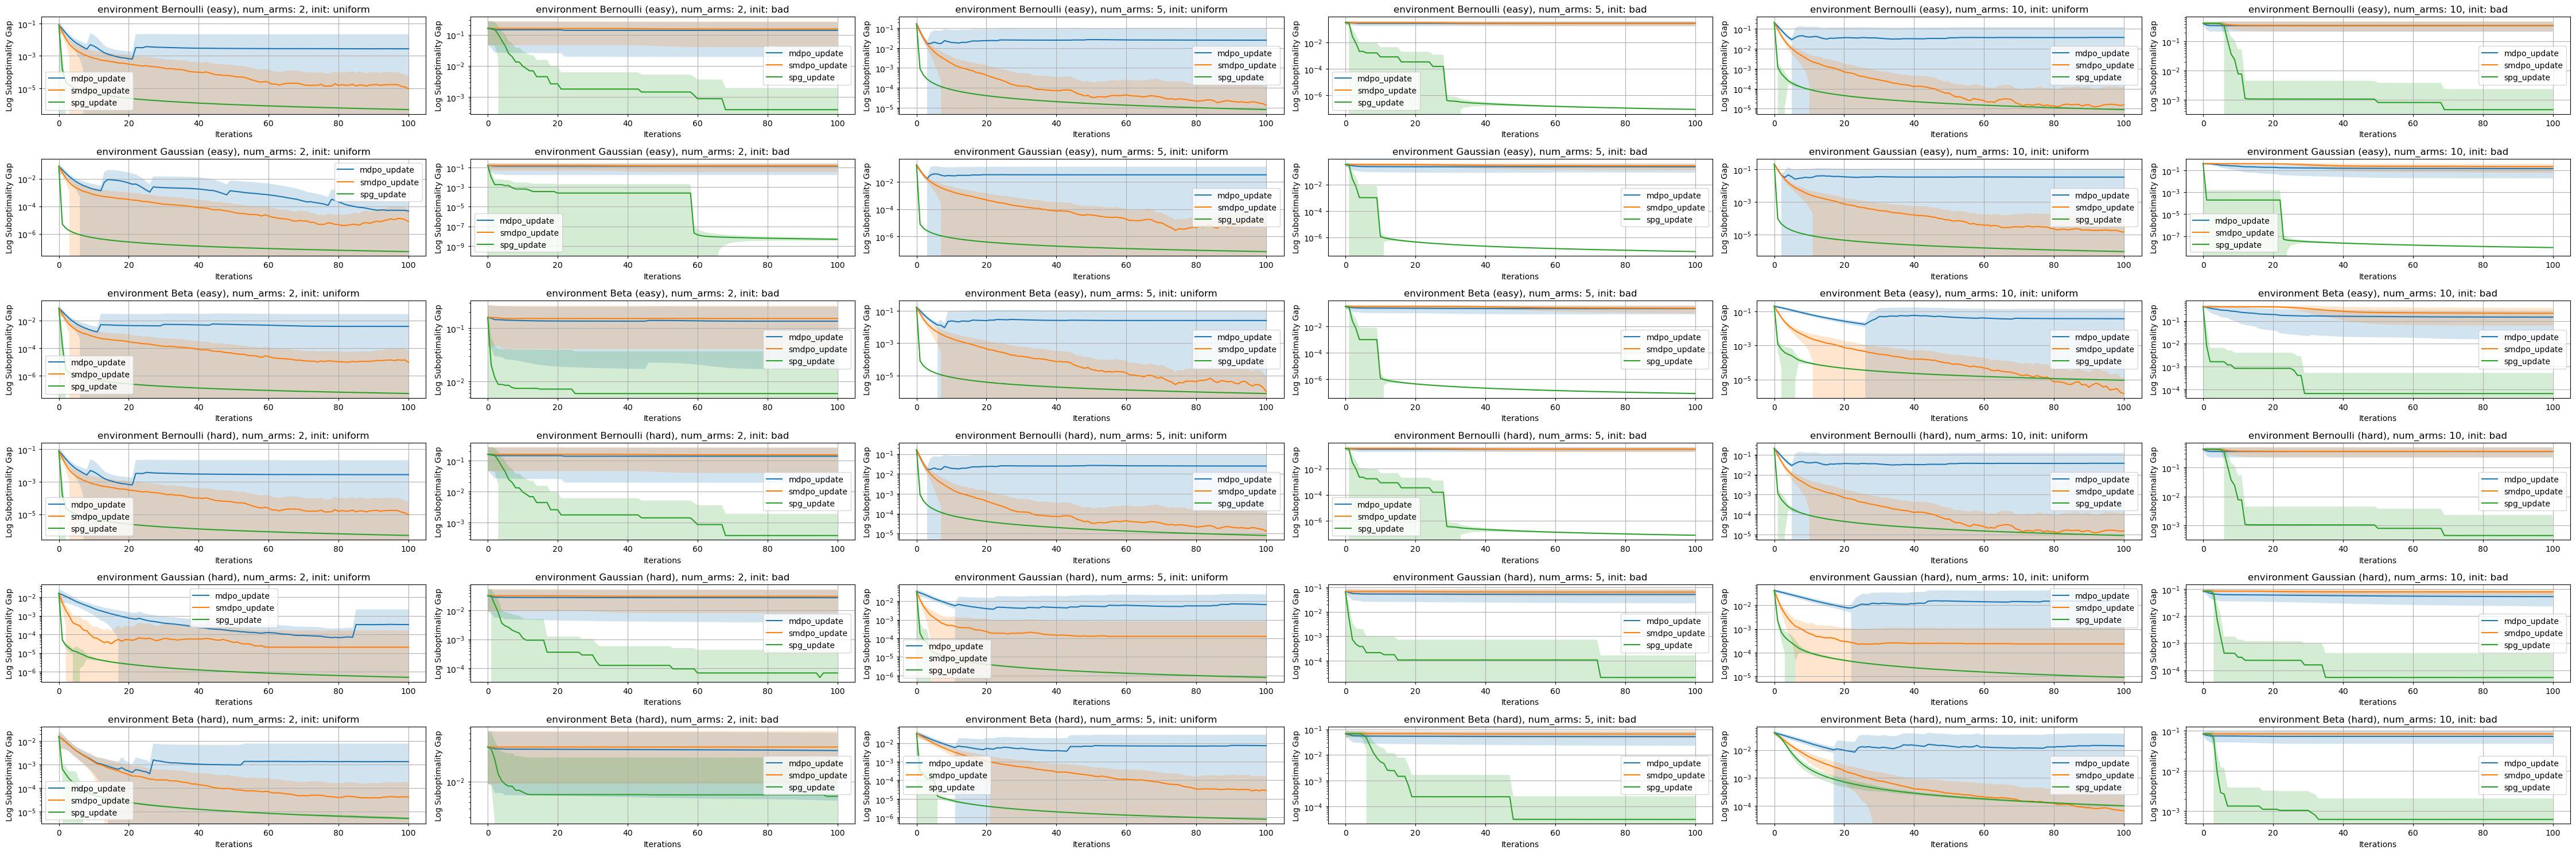

In [12]:
def plot_metric_for_various_env_configs():
    for k, algo_names in experiment_names.items():
        experiment_name = "{}_arms_{}_init_{}".format(k, num_arms, init)

        title = "environment {}, num_arms: {}, init: {}".format(environments[row_idx], num_arms, init)
        for algo_name in algo_names:
            # read the best results for the current algorithm.
            best_results_file_name = '{}_best_results.npy'.format(algo_name)
            best_results_dir = os.path.join(results_dir, experiment_name, environments[row_idx], best_results_file_name)
            best_results = np.load(best_results_dir, allow_pickle=True).item()

            # read the mean and std for the metric.
            mean = best_results['mean_{}'.format(metric)]
            std = best_results['std_{}'.format(metric)]

            # plot the mean and std.
            axes[row_idx, col_idx].plot(mean, label=algo_name)
            axes[row_idx, col_idx].fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)
            axes[row_idx, col_idx].legend()
            axes[row_idx, col_idx].set_title(title)
            axes[row_idx, col_idx].set_xlabel("Iterations")
            if metric == 'sub_opt_gap':
                axes[row_idx, col_idx].set_ylabel("Log {}".format(metric_map[metric]))
                axes[row_idx, col_idx].set_yscale("log")
            else:
                axes[row_idx, col_idx].set_ylabel("{}".format(metric_map[metric]))
            axes[row_idx, col_idx].grid(True)
    

# exp setup
metric = "sub_opt_gap"
env_indices = range(len(environments))
num_arms_list = [2, 5, 10]
init_list = ['uniform', 'bad']
results_root_dir = "results"
plot_root_dir = "SMDPO_VS_MDPO_PG_STOCH"
results_dir = os.path.join(results_root_dir, plot_root_dir)
# experiment_names = {
#     'constant_eta': ['mdpo_update', 'smdpo_update', 'pg_update'],
#     'delta_dependent_eta': ['smdpo_delta_dependent_update'],
# }
experiment_names = {
    'constant_eta_fine_gs': ['mdpo_update', 'smdpo_update'],
    'constant_eta': ['spg_update'],
}
metric_map = {'sub_opt_gap': 'Suboptimality Gap', 'opt_action_pr': 'Optimal Action'}

fig, axes = plt.subplots(nrows=len(environments), ncols=len(num_arms_list)*len(init_list), figsize=(45, 15))
for row_idx in env_indices:
    col_idx = 0
    for num_arms in num_arms_list:
        for init in init_list:
            plot_metric_for_various_env_configs()
            col_idx += 1

plt.tight_layout()
plot_dir = 'plots/{}'.format(plot_root_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output_path = os.path.join(plot_dir, "{}.png".format(metric))
plt.savefig(output_path, bbox_inches="tight")

0.5 0
0.5 101
0.5 202
0.5 303
0.5 404
0.5 505
0.5 606
0.5 707
0.5 808
0.5 909


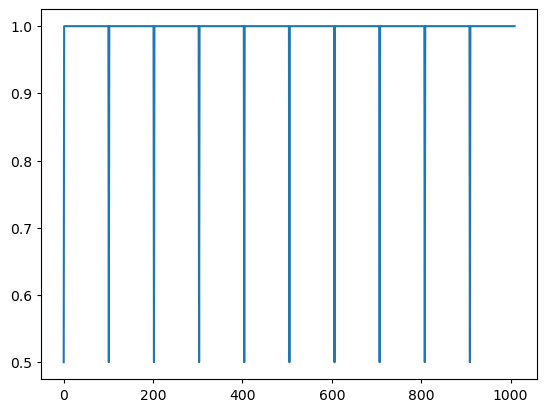

In [36]:
# input_path = 'results/SMDPO_DET_DELTA_DEPENDENT_VS_MDPO_PG/constant_eta_arms_5_init_uniform/Deterministic (0.05)/pg_update_best_results.npy'
# np.load(input_path, allow_pickle=True).item()['std_opt_action_pr'][-10:]

# plot mean_
plt.plot(mean_)
for idx, e in enumerate(mean_):
    if e < 1:
        print(e, idx)